# Entrenmiento con una RN Convolucional

A continuación vamos a probar el corpus que acabamos de crear utilizando una red convolucional similar a la utilizada en la práctica anterior.

1.   Arrastra el fichero zip creado en el punto anterior dentro de la carpeta <code>content</code>.

2.   Descomprime el zip usando el siguiente código. Primero has de cambiar en el código el nombre del fichero a descomprimir.

In [ ]:
import zipfile

local_zip = '/content/corpus.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content/')
zip_ref.close()

La generación del corpus a partir de ficheros de imágenes con Data Augmentation es similar a la realizada en una práctica anterior. La diferencia es que ahora vamos a trabajar con imágenes de 250x250 y a todo color.

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
#import keras_preprocessing
#from keras_preprocessing import image
#from keras_preprocessing.image import ImageDataGenerator

BATCH_SIZE = 100
WIDTH      = 150
HEIGHT     = 150

training_datagen = ImageDataGenerator(
      rescale = 1./255,
      rotation_range=5,
      width_shift_range=0.05,
      height_shift_range=0.05,
      zoom_range=0.3,
      horizontal_flip=True,
      shear_range=5)

train_generator = training_datagen.flow_from_directory(
	  "/content/training/",
    batch_size=BATCH_SIZE,
    #color_mode="grayscale",
	  target_size=(WIDTH, HEIGHT))

validation_datagen = ImageDataGenerator(
      rescale = 1./255)

validation_generator = validation_datagen.flow_from_directory(
	  "/content/validation/",
    batch_size=BATCH_SIZE,
    #color_mode="grayscale",
	  target_size=(WIDTH, HEIGHT))

Found 193 images belonging to 2 classes.
Found 51 images belonging to 2 classes.


A continuación, se define la red convolucional:

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(WIDTH, HEIGHT, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(2, activation='softmax') # Changed units from 3 to 2
])

model.summary()

model.compile(loss = 'categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

history = model.fit(
    train_generator,
    batch_size = BATCH_SIZE,
    epochs=75, #100
    validation_data = validation_generator,
    validation_batch_size = BATCH_SIZE)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_20 (Conv2D)              │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_20 (MaxPooling2D) │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_21 (Conv2D)              │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_21 (MaxPooling2D) │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_22 (Conv2D)              │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_22 (MaxPooling2D) │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_23 (Conv2D)              │ (None, 15, 15, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_23 (MaxPooling2D) │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 512)            │     3,211,776 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 2)              │         1,026 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,453,634 (13.17 MB)

 Trainable params: 3,453,634 (13.17 MB)

 Non-trainable params: 0 (0.00 B)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/75
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.5729 - loss: 1.4576

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


2/2 ━━━━━━━━━━━━━━━━━━━━ 13s 5s/step - accuracy: 0.5667 - loss: 1.7153 - val_accuracy: 0.5294 - val_loss: 1.0205
Epoch 2/75
2/2 ━━━━━━━━━━━━━━━━━━━━ 11s 5s/step - accuracy: 0.5123 - loss: 0.9624 - val_accuracy: 0.4706 - val_loss: 0.8640
Epoch 3/75
2/2 ━━━━━━━━━━━━━━━━━━━━ 11s 6s/step - accuracy: 0.5354 - loss: 0.7338 - val_accuracy: 0.4510 - val_loss: 0.6937
Epoch 4/75
2/2 ━━━━━━━━━━━━━━━━━━━━ 11s 5s/step - accuracy: 0.5460 - loss: 0.6920 - val_accuracy: 0.4706 - val_loss: 0.6960
Epoch 5/75
2/2 ━━━━━━━━━━━━━━━━━━━━ 10s 5s/step - accuracy: 0.5454 - loss: 0.6869 - val_accuracy: 0.4706 - val_loss: 0.7021
Epoch 6/75
2/2 ━━━━━━━━━━━━━━━━━━━━ 11s 5s/step - accuracy: 0.4828 - loss: 0.6911 - val_accuracy: 0.4706 - val_loss: 0.7095
Epoch 7/75
2/2 ━━━━━━━━━━━━━━━━━━━━ 20s 6s/step - accuracy: 0.5561 - loss: 0.6808 - val_accuracy: 0.4706 - val_loss: 0.6896
Epoch 8/75
2/2 ━━━━━━━━━━━━━━━━━━━━ 12s 6s/step - accuracy: 0.5361 - loss: 0.6830 - val_accuracy: 0.4706 - val_loss: 0.7269
Epoch 9/75
2/2 ━━━━

Ejecuta el siguiente código para obtener una gráfica con la precisión obtenida en las diferentes iteraciones del entrenamiento:

# Mejora del modelo con MobileNetV3

In [ ]:
# Re-create the validation generator to ensure it's fresh for evaluation
validation_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale = 1./255)

validation_generator_eval = validation_datagen.flow_from_directory(
	  "/content/validation/",
    batch_size=BATCH_SIZE,
	  target_size=(WIDTH, HEIGHT),
    shuffle=False) # Keep shuffle=False for consistent evaluation

# Evaluate the model on the validation data
loss, accuracy = model.evaluate(validation_generator_eval)

# Print the results
print(f"Validation Loss: {loss}")
print(f"Validation Accuracy: {accuracy}")

Found 51 images belonging to 2 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.8431 - loss: 0.5405
Validation Loss: 0.5405316352844238
Validation Accuracy: 0.843137264251709


In [ ]:
#AQUI HAGO ENTRENAMIENTO DE CNN ya entrenada de MobileNet usando Transfer Learning

import tensorflow as tf
from tensorflow.keras.applications import MobileNetV3Small
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
import shutil
from tensorflow.keras.applications.mobilenet_v3 import preprocess_input

# Define los parámetros
BATCH_SIZE = 32
NUM_CLASSES = 2 # Asegúrate de cambiar esto si tienes un número diferente de clases
WIDTH  = 224
HEIGHT = 224

training_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=5,
    width_shift_range=0.05,
    height_shift_range=0.05,
    zoom_range=0.5,
    horizontal_flip=True,
    shear_range=5
)

train_generator = training_datagen.flow_from_directory(
    "/content/training/",
    batch_size=BATCH_SIZE,
    target_size=(WIDTH, HEIGHT)
)

validation_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input
)

validation_generator = validation_datagen.flow_from_directory(
    "/content/validation/",
    batch_size=BATCH_SIZE,
    target_size=(WIDTH, HEIGHT)
)

# Incluye top=False para no incluir la capa de clasificación final de ImageNet
base_model = MobileNetV3Small(input_shape=(WIDTH, HEIGHT, 3), include_top=False, weights='imagenet')

# Congela las capas del modelo base para no reentrenarlas
for layer in base_model.layers:
    layer.trainable = False

# Añade capas personalizadas para tu problema de clasificación
x = base_model.output
x = GlobalAveragePooling2D()(x) # Capa para aplanar la salida convolucional
x = Dense(512, activation='relu')(x) # Una capa Dense para tu problema
predictions = Dense(NUM_CLASSES, activation='softmax')(x) # Capa de salida con el número de clases

model_transfer = Model(inputs=base_model.input, outputs=predictions)

model_transfer.compile(loss = 'categorical_crossentropy',
                       optimizer=Adam(learning_rate=1e-4),
                       metrics=['accuracy'])

history_transfer = model_transfer.fit(
    train_generator,
    batch_size = BATCH_SIZE,
    epochs=100,
    validation_data = validation_generator,
    validation_batch_size = BATCH_SIZE)

Found 193 images belonging to 2 classes.
Found 51 images belonging to 2 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 707ms/step - accuracy: 0.7758 - loss: 0.5425

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


7/7 ━━━━━━━━━━━━━━━━━━━━ 14s 1s/step - accuracy: 0.7786 - loss: 0.5390 - val_accuracy: 0.8627 - val_loss: 0.4768
Epoch 2/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 623ms/step - accuracy: 0.8560 - loss: 0.3833 - val_accuracy: 0.8824 - val_loss: 0.4065
Epoch 3/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 6s 859ms/step - accuracy: 0.9387 - loss: 0.3042 - val_accuracy: 0.8235 - val_loss: 0.3928
Epoch 4/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 583ms/step - accuracy: 0.9379 - loss: 0.2891 - val_accuracy: 0.9020 - val_loss: 0.3420
Epoch 5/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 581ms/step - accuracy: 0.9596 - loss: 0.2227 - val_accuracy: 0.9412 - val_loss: 0.2911
Epoch 6/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 6s 840ms/step - accuracy: 0.9668 - loss: 0.1917 - val_accuracy: 0.9412 - val_loss: 0.2648
Epoch 7/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 603ms/step - accuracy: 0.9631 - loss: 0.1834 - val_accuracy: 0.9412 - val_loss: 0.2527
Epoch 8/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 901ms/step - accuracy: 0.9713 - loss: 0.1509 - val_accuracy: 0.9608 - val_loss: 0.233

In [ ]:
# Re-create the validation generator with correct preprocessing
validation_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    preprocessing_function=preprocess_input  # ✅ Must match training
)

validation_generator_eval = validation_datagen.flow_from_directory(
	  "/content/validation/",
    batch_size=BATCH_SIZE,
	  target_size=(WIDTH, HEIGHT),
    shuffle=False) # Keep shuffle=False for consistent evaluation

# Evaluate the model on the validation data
loss, accuracy = model_transfer.evaluate(validation_generator_eval)

# Print the results
print(f"Validation Loss: {loss}")
print(f"Validation Accuracy: {accuracy}")

Found 51 images belonging to 2 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 250ms/step - accuracy: 0.8826 - loss: 0.2609
Validation Loss: 0.22157585620880127
Validation Accuracy: 0.9019607901573181


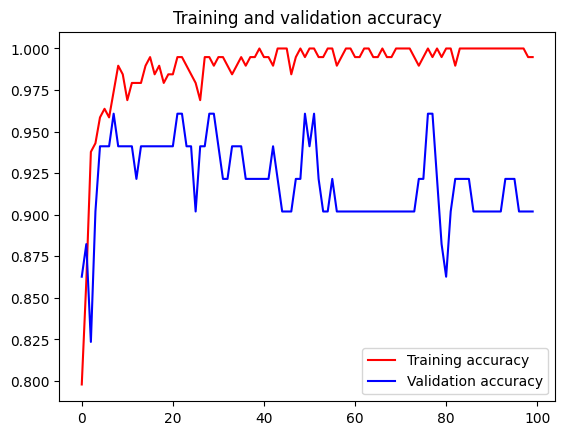

<Figure size 640x480 with 0 Axes>

In [ ]:
#@title Doble clic para mostrar código. { display-mode: "form" }

import matplotlib.pyplot as plt

def show_accuracy(history):
  acc = history.history['accuracy']
  val_acc = history.history['val_accuracy']
  #loss = history.history['loss']
  #val_loss = history.history['val_loss']
  epochs = range(len(acc))
  plt.plot(epochs, acc, 'r', label='Training accuracy')
  plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
  plt.title('Training and validation accuracy')
  plt.legend(loc=0)
  plt.figure()
  plt.show()

show_accuracy(history_transfer) # Changed to use history_transfer

# La Matriz de Confusión

Permite visualiza cuantos ejemplos son correctamente clasificados y en el caso que sean incorrectamente clasificados, con que clase se confunden.

2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 2s/step


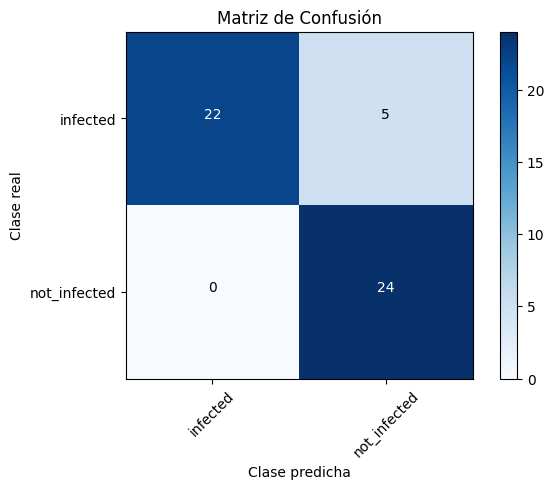

In [ ]:
from collections import Counter
from sklearn.metrics import confusion_matrix
import itertools
import numpy as np

def plot_confusion_matrix(cm, classes_map,
                          normalize=False,
                          title='Matriz de Confusión',
                          cmap=plt.cm.Blues):
    """
    Esta función visualiza la matriz de confusión.
    Usa el parámetro `normalize=True` para normalizar los resultados.
    Note, this code is taken straight from the SKLEARN website, an nice way of viewing confusion matrix.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes_map))
    inv_map = {v: k for k, v in classes_map.items()}
    labels = inv_map.values()
    plt.xticks(tick_marks, labels, rotation=45)
    plt.yticks(tick_marks, labels)
    if normalize:
        cm = np.around(cm.astype('float') / cm.sum(axis=1)[:, np.newaxis], 2)
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('Clase real')
    plt.xlabel('Clase predicha')

"""
Obtener la matriz de confusión de un corpus creado desde un ImageDataGenerator
es algo más complejo que el último ejemplo estudiado. El problema está en que las
muestras son extraidas por lotes (bath) y la función
confusion_matrix(validation_classes, y_pred) espera que sus dos parámetros sean
vectores. Para resolverlo recorremos todos los lotes el generador y vamos
concatenando los vectores adecuados.
Otra solución alternativa en:
https://stackoverflow.com/questions/47907061/how-to-get-confusion-matrix-when-using-model-fit-generator
"""
validation_classes = []
validation_images = []
for i in range( -(-validation_generator.samples // validation_generator.batch_size)):  # número de veces que podemos sacar batch redondeado hacia arriba
   batch = next(validation_generator)
   expected = np.argmax(batch[1], axis=1)
   validation_classes.extend(expected)
   validation_images.extend(batch[0])
validation_classes = np.array(validation_classes)
validation_images = np.array(validation_images)
Y_pred = model_transfer.predict(validation_images) # Changed model to model_transfer
y_pred = np.argmax(Y_pred, axis=1)
my_confussion = confusion_matrix(validation_classes, y_pred)
plot_confusion_matrix(my_confussion, classes_map = validation_generator.class_indices)#, normalize=True)

# Guardado y testeo del modelo

In [ ]:
# Save the model in .keras format
model_transfer.save('my_image_classification_model.keras')

In [ ]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.applications.mobilenet_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model

# Cargar el modelo entrenado
model = load_model('my_image_classification_model.keras')

# Ruta a la imagen
img_path = 'validation/infected/43_0.jpg'

# Parámetros del modelo
IMG_SIZE = 224

# Cargar y preprocesar imagen
img = image.load_img(img_path, target_size=(IMG_SIZE, IMG_SIZE))
img_array = image.img_to_array(img)  # convierte a array numpy (H,W,C)
img_array = np.expand_dims(img_array, axis=0)  # añade dimensión batch
img_array = preprocess_input(img_array)  # normaliza como MobileNetV3 espera

# Hacer predicción
predictions = model.predict(img_array)
predicted_class = np.argmax(predictions, axis=1)

# Mostrar resultados
print("Predicciones:", predictions)
print("Clase predicha:", predicted_class)

/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 6 variables whereas the saved optimizer has 10 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Predicciones: [[0.95359194 0.04640812]]
Clase predicha: [0]


## LA CLASE 0 ES INFECTED.

# AHORA DEBAJO PRUEBO CON IMAGENES NUNCA VISTAS QUE NO ESTAN EN EL DATASET

In [ ]:
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model
from tensorflow.keras.applications.mobilenet_v3 import preprocess_input
import os

# Load the trained model (using .keras format is recommended)
# Make sure 'my_image_classification_model.keras' exists, or change the filename
try:
    model = load_model('my_image_classification_model.keras')
except Exception as e:
    print(f"Error loading model: {e}")
    print("Attempting to load from .h5 (legacy format)...")
    try:
        # This might still fail depending on the Keras version and model complexity
        model = load_model('my_image_classification_model.h5')
    except Exception as e_h5:
        print(f"Error loading model from .h5: {e_h5}")
        model = None
        print("Could not load the model. Please ensure 'my_image_classification_model.keras' or 'my_image_classification_model.h5' exists and is compatible.")


# Parámetros del modelo
IMG_SIZE = 224 # Ensure this matches the training size

def predict_image_list(image_paths, model, img_size):
    if model is None:
        print("Model not loaded. Cannot make predictions.")
        return

    images = []
    processed_image_paths = [] # Keep track of successfully processed paths

    for img_path in image_paths:
        if not os.path.exists(img_path):
            print(f"Warning: Image not found at path: {img_path}. Skipping.")
            continue

        try:
            # Load and resize the image
            img = image.load_img(img_path, target_size=(img_size, img_size))
            # Convert to numpy array
            img_array = image.img_to_array(img)
            # Add batch dimension
            img_array = np.expand_dims(img_array, axis=0)
            # Apply the same preprocessing as training
            img_array = preprocess_input(img_array)

            images.append(img_array)
            processed_image_paths.append(img_path)

        except Exception as e:
            print(f"Error processing image {img_path}: {e}. Skipping.")
            continue

    if not images:
        print("No valid images were processed.")
        return

    # Concatenate all processed images into a single batch
    images_batch = np.vstack(images)

    # Make predictions for the entire batch
    predictions = model.predict(images_batch)

    # Get class indices mapping from the validation generator if available
    # Assuming validation_generator is still in the notebook's environment
    class_indices = None
    if 'validation_generator' in locals():
        class_indices = validation_generator.class_indices
        inv_map = {v: k for k, v in class_indices.items()}
    else:
        print("Warning: validation_generator not found. Cannot map class indices to names.")
        inv_map = {0: 'Class 0', 1: 'Class 1'} # Default mapping

    # Display results for each image
    print("\n--- Predictions ---")
    for i, pred in enumerate(predictions):
        predicted_class_index = np.argmax(pred)
        predicted_class_name = inv_map.get(predicted_class_index, f'Unknown Class {predicted_class_index}')
        confidence = pred[predicted_class_index]

        print(f"Image: {processed_image_paths[i]}")
        print(f"  Predicted Class: {predicted_class_name} (Index: {predicted_class_index})")
        print(f"  Confidence: {confidence:.4f}")
        # Optionally, print the full prediction array:
        # print(f"  Full Predictions: {pred}")
    print("-------------------")

# Example usage:
# Create a list of image paths you want to predict on
# Replace these with actual paths to your images
image_paths_to_predict = [
    'infected_1.jpg',
    'infected_2.jpg',
    'normal_1.jpg',
    'normal_2.jpg'
]

# Make predictions using the function
predict_image_list(image_paths_to_predict, model, IMG_SIZE)

/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 6 variables whereas the saved optimizer has 10 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step

--- Predictions ---
Image: infected_1.jpg
  Predicted Class: Class 0 (Index: 0)
  Confidence: 0.8207
Image: infected_2.jpg
  Predicted Class: Class 0 (Index: 0)
  Confidence: 0.9928
Image: normal_1.jpg
  Predicted Class: Class 1 (Index: 1)
  Confidence: 0.9999
Image: normal_2.jpg
  Predicted Class: Class 1 (Index: 1)
  Confidence: 0.9992
-------------------
